# Importing Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
import inflection

warnings.filterwarnings('ignore')
pd.set_option('display.precision', 2)
pd.set_option('display.max_columns', None)

# Dataset Overview

## Reading Dataset

In [56]:
df = pd.read_csv('loan_data_2007_2014.csv', index_col='Unnamed: 0')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.07,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.65,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.30,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.17,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check Duplicated Data

In [57]:
df.duplicated().sum()

0

## Check Missing Value

In [58]:
# total null values
null_total = pd.DataFrame(df.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*df.isna().sum()/df.shape[0]).T.rename({0:'percentage_null'})

# combine the columns
data_null = pd.concat([null_total, data_null_percentage], axis=0).T

# only show columns that have missing values
data_null = round(data_null[data_null['total_null'] != 0].sort_values('total_null', ascending=False), 2)
data_null

,total_null,percentage_null
dti_joint,466285.0,100.00
annual_inc_joint,466285.0,100.00
total_cu_tl,466285.0,100.00
inq_fi,466285.0,100.00
all_util,466285.0,100.00
max_bal_bc,466285.0,100.00
open_rv_24m,466285.0,100.00
open_rv_12m,466285.0,100.00
il_util,466285.0,100.00
total_bal_il,466285.0,100.00


I'll drop some columns with missing value more than 15%

In [59]:
print(f'before handling missing value {df.shape[1]} columns')
null = data_null[data_null['percentage_null'] > 15]
column_null = null.index.tolist()
df = df.drop(columns=column_null)
print(f'after handling missing value {df.shape[1]} columns')

before handling missing value 74 columns
after handling missing value 49 columns


## Update Missing Value

In [60]:
# total null values
null_total = pd.DataFrame(df.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*df.isna().sum()/df.shape[0]).T.rename({0:'percentage_null'})

# combine the columns
data_null = pd.concat([null_total, data_null_percentage], axis=0).T

# only show columns that have missing values
data_null = round(data_null[data_null['total_null'] != 0].sort_values('total_null', ascending=False), 2)
data_null

,total_null,percentage_null
emp_title,27588.0,5.92
emp_length,21008.0,4.51
last_pymnt_d,376.0,0.08
revol_util,340.0,0.07
collections_12_mths_ex_med,145.0,0.03
last_credit_pull_d,42.0,0.01
delinq_2yrs,29.0,0.01
earliest_cr_line,29.0,0.01
inq_last_6mths,29.0,0.01
open_acc,29.0,0.01


I have deleted 22 columns with highest missing value only 5%

## Data Types

### Numerical

In [61]:
numerical = df.select_dtypes(include=np.number).columns.values.tolist()
numerical

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq']

### Categorical

In [62]:
categorical = df.select_dtypes(exclude=np.number).columns.values.tolist()
df[categorical] = df[categorical].apply(lambda x: x.str.lower())
categorical

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

change all values in the category columns to lower case

# Exploratory Data Analysis

## Target Variable

In [63]:
df['loan_status'].value_counts()

current                                                224226
fully paid                                             184739
charged off                                             42475
late (31-120 days)                                       6900
in grace period                                          3146
does not meet the credit policy. status:fully paid       1988
late (16-30 days)                                        1218
default                                                   832
does not meet the credit policy. status:charged off       761
Name: loan_status, dtype: int64


**The loan status has many categories**. <br>
Based on reference from [LendingClub](https://www.lendingclub.com/loans/personal-loans), the definition of each status is:
* **Current** : Loan is up to date on all outstanding payments.
* **Fully Paid** : Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.
* **Charged Off** : Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached.
* **Late (31-120)** : Loan has not been current for 31 to 120 days.
* **In Grace Period** : Loan is past due but within the 15-day grace period.
* **Late (16-30)** : Loan has not been current for 16 to 30 days.
* **Default** : Loan has not been current for 121 days or more.

Based on those descriptions, I will create a new feature with loan status labels are **Good** or **Bad**. <br>
The status labeled **Good** is when the loan status is either Current or Fully Paid, otherwise the status is **Bad**. <br>
I won't include the does not meet the credit policy. status:fully paid and does not meet the credit policy. status:charged off, because it doesn't meet the credit policy.

In [64]:
df_viz = df.copy()
def status(x):
    if x == 'current':
        return 'good'
    elif x == 'fully paid':
        return 'good'
    else:
        return 'bad'
df_viz['target'] = df_viz['loan_status'].apply(status)

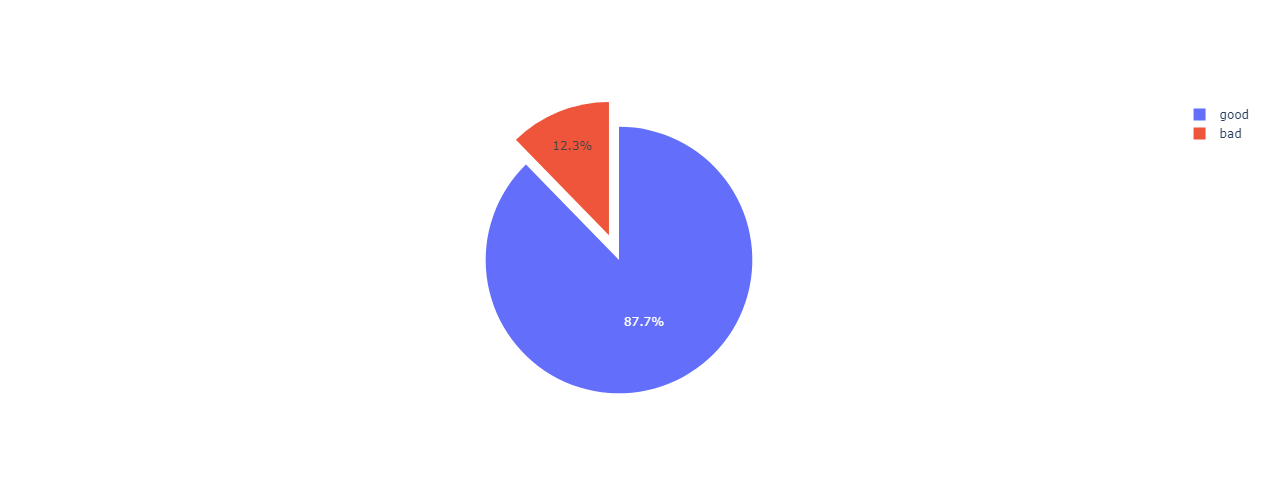

In [65]:
labels = df_viz['target'].value_counts(normalize=True).index.to_list()
values = df_viz['target'].value_counts(normalize=True).values * 100

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2])])
fig.update_layout(
    autosize=False,
    width=500,
    height=500)
fig.show()

Technically, this dataset is an imbalanced dataset.

## Loan Credit Risk Probability in Numerical Columns 

In [66]:
df_viz[numerical].nunique().sort_values()

policy_code                        1
acc_now_delinq                     6
collections_12_mths_ex_med         9
delinq_2yrs                       24
pub_rec                           26
inq_last_6mths                    28
open_acc                          62
total_acc                        112
int_rate                         506
revol_util                      1269
loan_amnt                       1352
funded_amnt                     1354
dti                             3997
total_rec_late_fee              5808
funded_amnt_inv                 9854
collection_recovery_fee        20275
recoveries                     22773
annual_inc                     31901
installment                    55622
revol_bal                      58142
out_prncp                     135665
out_prncp_inv                 141189
total_rec_prncp               172713
last_pymnt_amnt               198194
total_rec_int                 270249
total_pymnt_inv               347659
total_pymnt                   351609
m

**Dropping Column**
- I think 'id' & 'member_id' doesn't give further information. So, i'll drop it
- 'policy_code' column that only has 1 value, then I will drop it

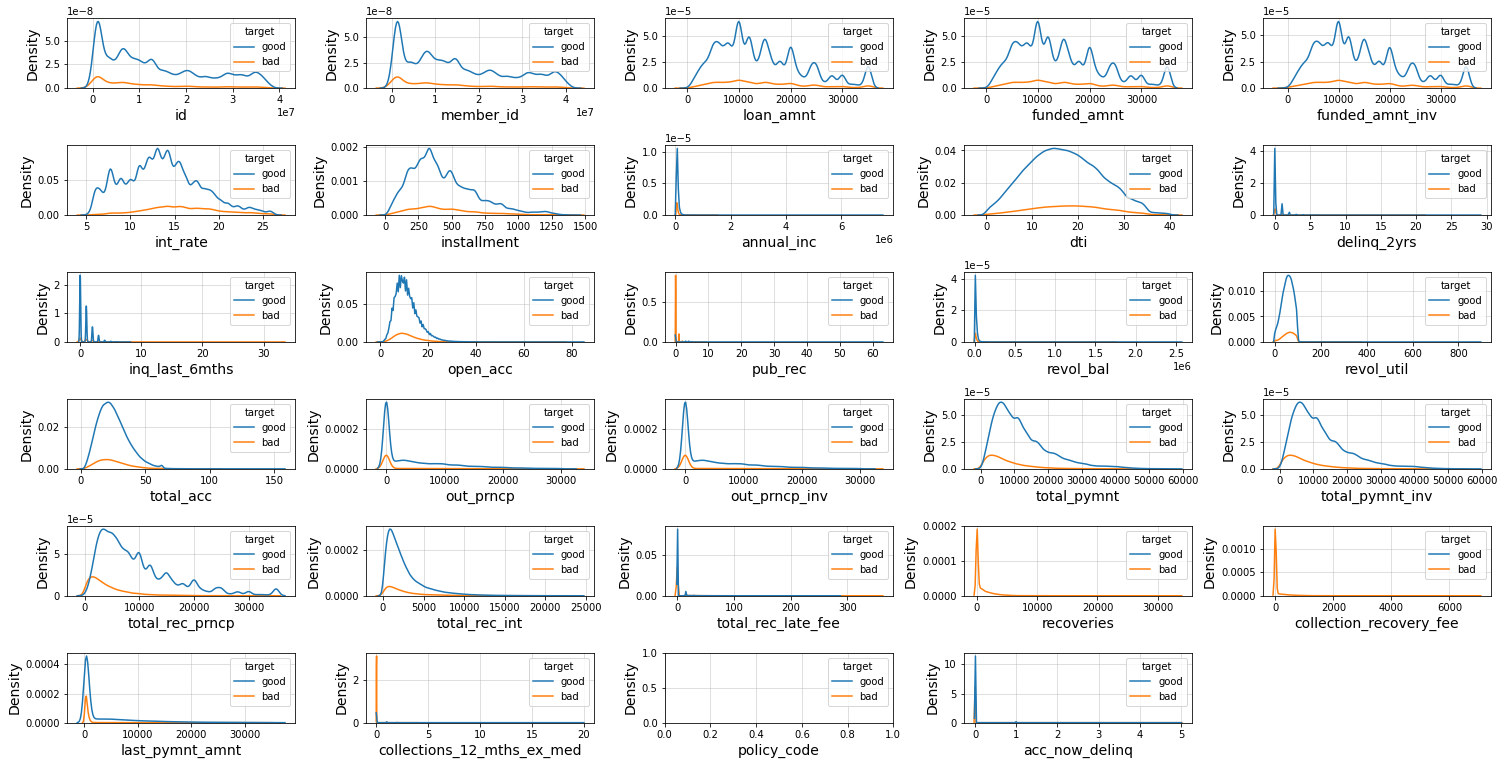

In [67]:
plt.figure(figsize=(21, 12))
for i, col in enumerate(numerical):
    plt.subplot(7, 5, i+1)
    sns.kdeplot(
        x=df_viz[col],
        hue=df_viz['target'],
    )
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()

plt.show()

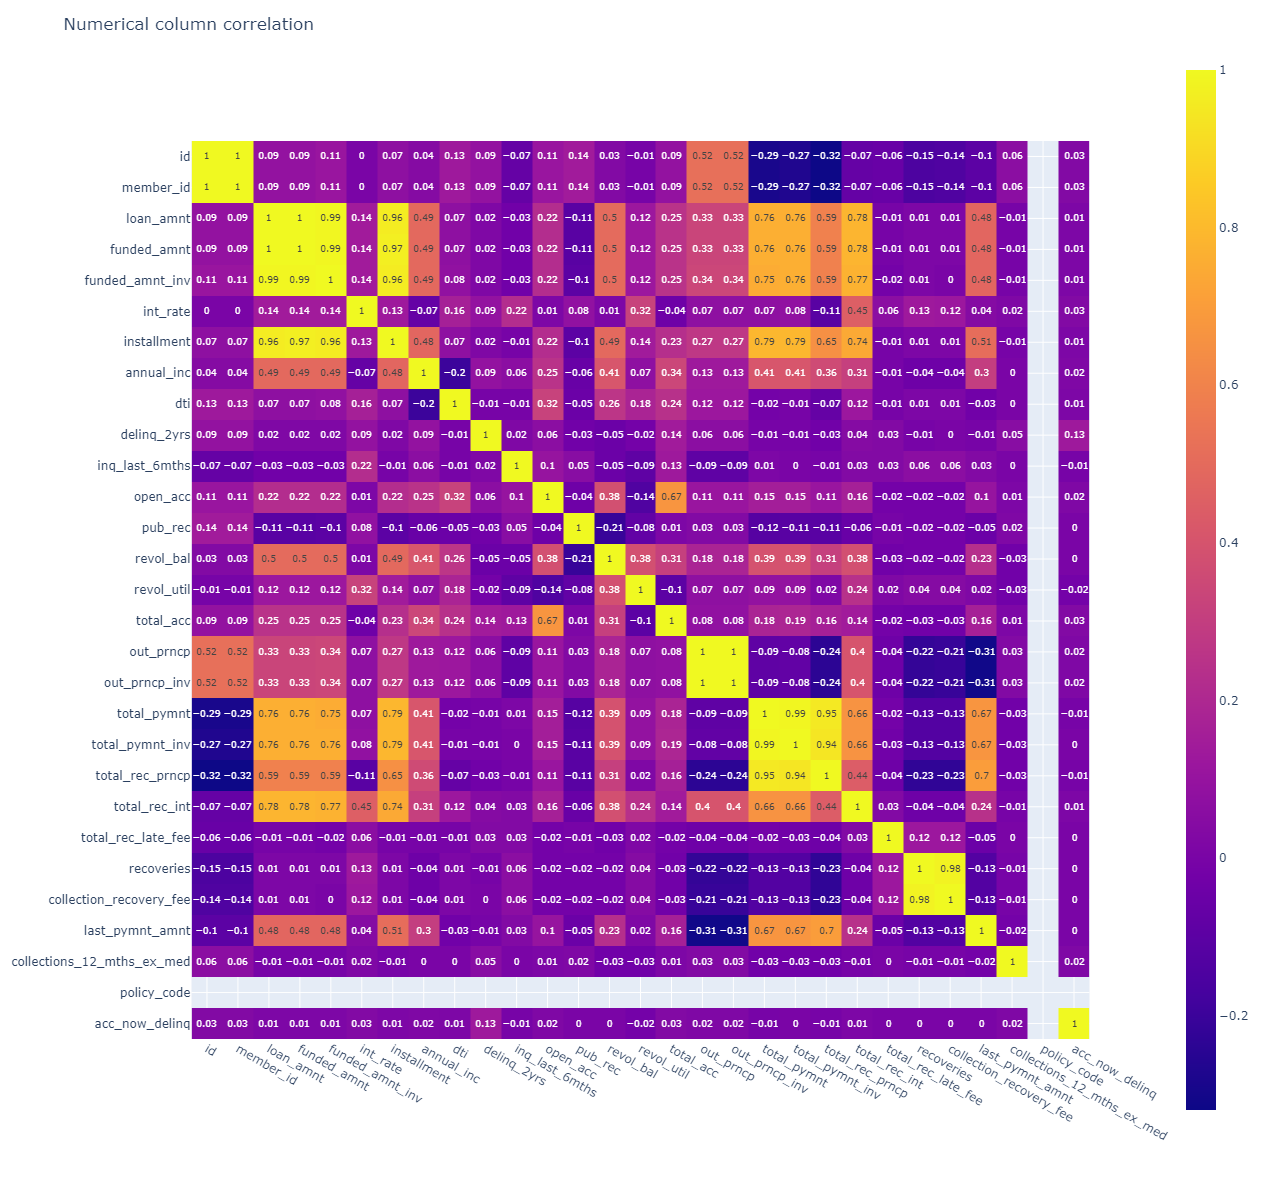

In [68]:
data = df_viz[numerical].corr(method='spearman').round(2)

fig = px.imshow(data, text_auto=True)
fig.update_layout(title='Numerical column correlation',
                  width=1200,
                  height=1200
                 )
fig.show()

### Drop Column

In [69]:
df_viz.drop(columns=['id', 'member_id', 'policy_code'], inplace=True)

**Dropping Multicollinearity Numerical Columns**

In [70]:
num_to_drop = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'collections_12_mths_ex_med',
               'out_prncp_inv', 'acc_now_delinq', 'total_pymnt', 'total_pymnt_inv', 'collection_recovery_fee']

df_viz.drop(columns=num_to_drop, inplace=True)

### Update Numerical Column

In [71]:
col_num = df_viz.select_dtypes(include=np.number).columns.values.tolist()

df_viz[col_num].nunique().sort_values()

pub_rec                   26
open_acc                  62
total_acc                112
revol_util              1269
total_rec_late_fee      5808
recoveries             22773
annual_inc             31901
installment            55622
revol_bal              58142
out_prncp             135665
total_rec_prncp       172713
last_pymnt_amnt       198194
total_rec_int         270249
dtype: int64

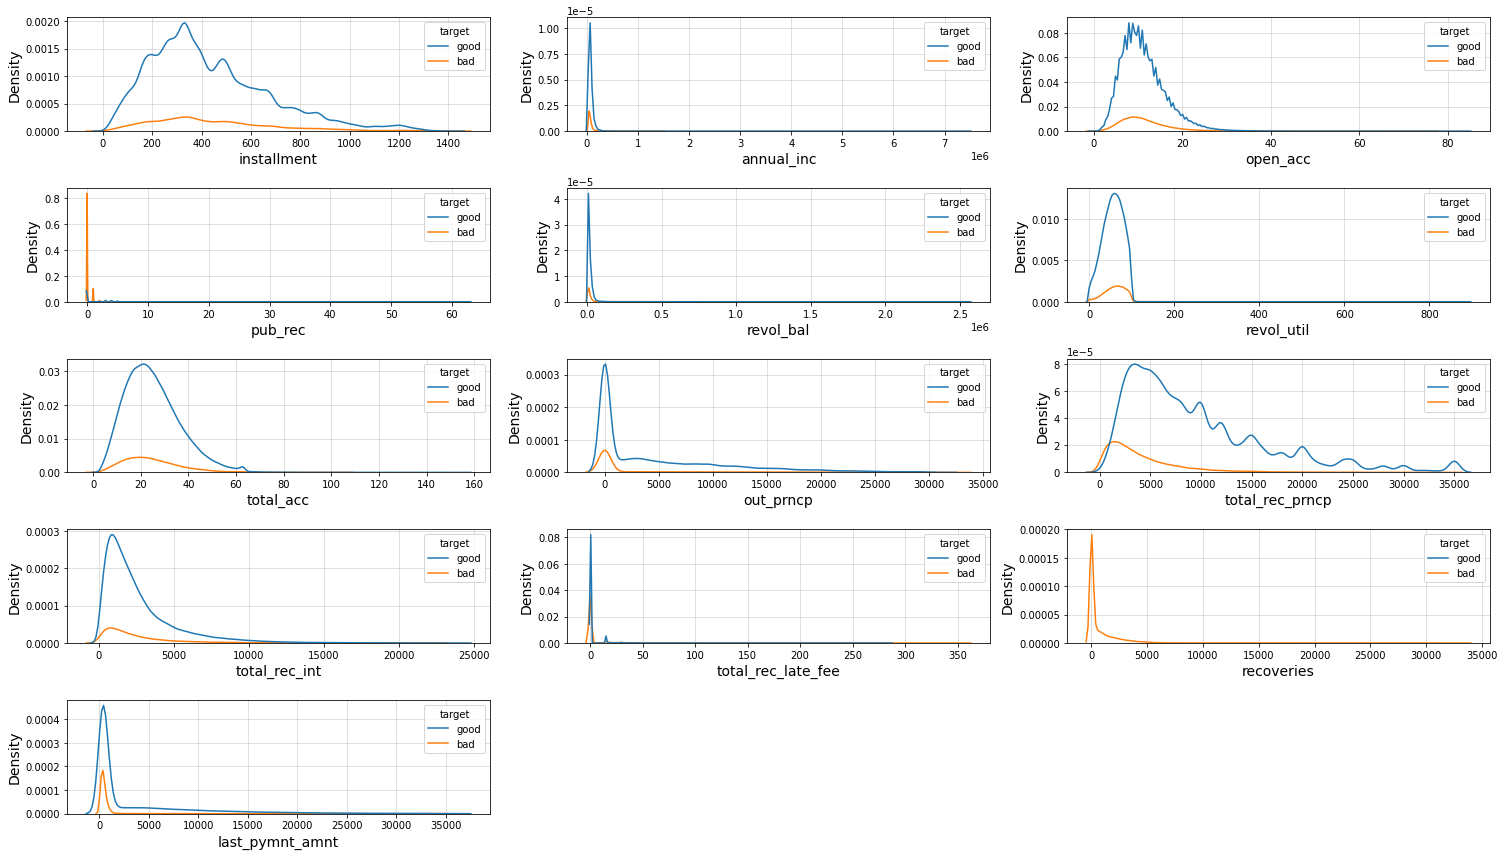

In [72]:
plt.figure(figsize=(21, 12))
for i, col in enumerate(col_num):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(
        x=df_viz[col],
        hue=df_viz['target'],
    )
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()

plt.show()

## Loan Credit Risk Probability in Categorical Columns 

In [73]:
df_viz[categorical].nunique().sort_values()

application_type            1
initial_list_status         2
term                        2
pymnt_plan                  2
verification_status         3
home_ownership              6
grade                       7
loan_status                 9
emp_length                 11
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    91
last_pymnt_d               98
last_credit_pull_d        103
earliest_cr_line          664
zip_code                  888
title                   53260
emp_title              183322
url                    466285
dtype: int64

### Payment Plan

In [74]:
df_viz['pymnt_plan'].value_counts()

n    466276
y         9
Name: pymnt_plan, dtype: int64

- Payment plan y only has 9 value, i'll drop it

### Address State

In [75]:
df_viz['addr_state'].value_counts()

ca    71450
ny    40242
tx    36439
fl    31637
il    18612
nj    18061
pa    16424
oh    15237
ga    14975
va    14222
nc    12682
mi    11549
ma    11072
md    10974
az    10712
wa    10517
co     9739
mn     8158
mo     7508
ct     7204
in     6525
nv     6519
tn     5984
or     5949
wi     5911
al     5853
sc     5583
la     5489
ky     4438
ks     4190
ok     4117
ar     3488
ut     3428
nm     2588
hi     2487
wv     2412
nh     2232
ri     2050
dc     1426
mt     1396
de     1272
ak     1251
ms     1226
wy     1128
sd      980
vt      905
ia       14
ne       14
id       12
me        4
Name: addr_state, dtype: int64

- There is some categories that has low value, it's hard to interpretation, so i'll drop it

### Initial List Status

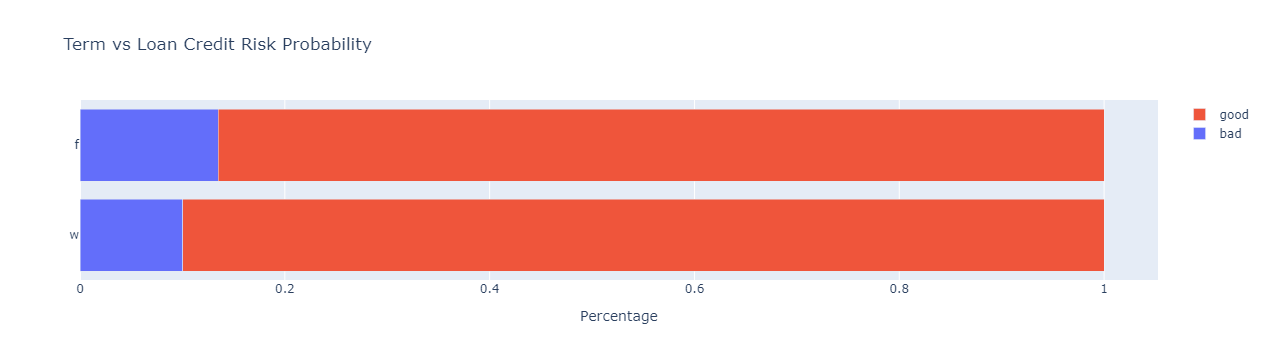

In [76]:
initial_status = pd.crosstab(df_viz['initial_list_status'],
                   df_viz['target'],
                   normalize='index',
                   colnames=[None]).reset_index().sort_values('bad')

fig = go.Figure()
fig.add_trace(go.Bar(
    y=initial_status['initial_list_status'],
    x=initial_status['bad'],
    name='bad',
    orientation='h',
))
fig.add_trace(go.Bar(
    y=initial_status['initial_list_status'],
    x=initial_status['good'],
    name='good',
    orientation='h',
))
fig.update_layout(barmode='stack',
                  xaxis_title='Percentage',
                  title='Term vs Loan Credit Risk Probability')


fig.show()

### Term

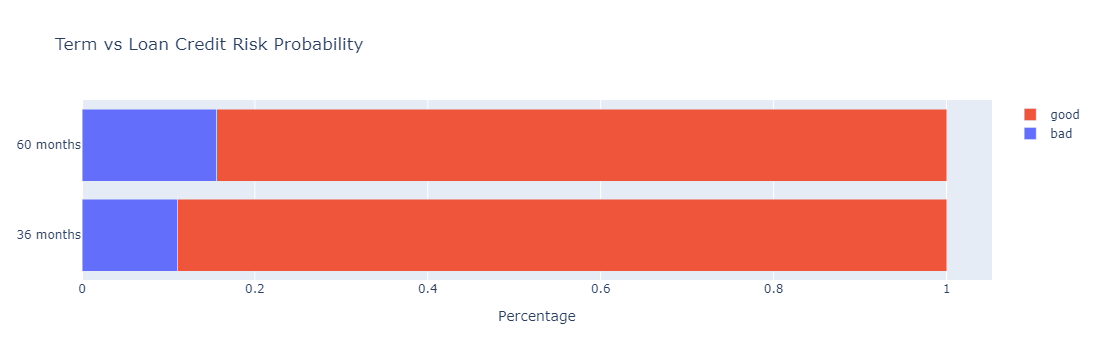

In [77]:
term = pd.crosstab(df_viz['term'],
                   df_viz['target'],
                   normalize='index',
                   colnames=[None]).reset_index().sort_values('bad')

fig = go.Figure()
fig.add_trace(go.Bar(
    y=term['term'],
    x=term['bad'],
    name='bad',
    orientation='h',
))
fig.add_trace(go.Bar(
    y=term['term'],
    x=term['good'],
    name='good',
    orientation='h',
))
fig.update_layout(barmode='stack',
                  xaxis_title='Percentage',
                  title='Term vs Loan Credit Risk Probability')


fig.show()

### Verification Status

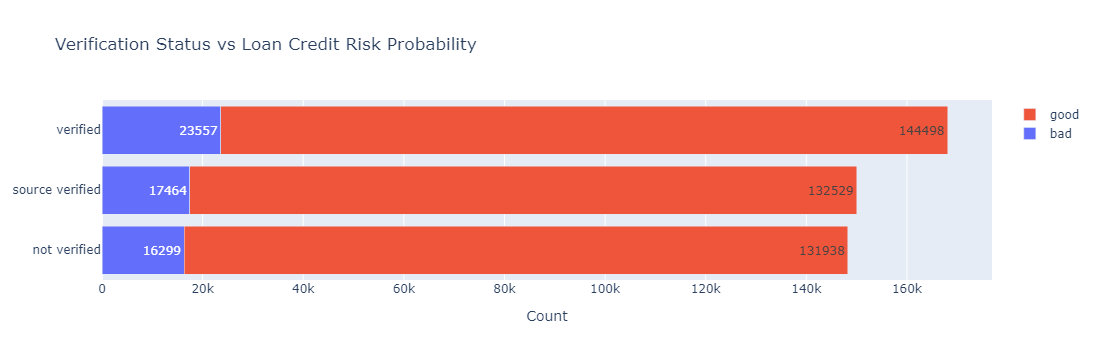

In [78]:
verif = pd.crosstab(df_viz['verification_status'],
                    df_viz['target'],
                    colnames=[None]).reset_index().sort_values('bad')

fig = go.Figure()
fig.add_trace(go.Bar(
    y=verif['verification_status'],
    x=verif['bad'],
    name='bad',
    orientation='h',
    text=verif['bad']
))
fig.add_trace(go.Bar(
    y=verif['verification_status'],
    x=verif['good'],
    name='good',
    orientation='h',
    text=verif['good']
))
fig.update_layout(barmode='stack',
                  xaxis_title='Count',
                  title='Verification Status vs Loan Credit Risk Probability')


fig.show()

### Home Ownership

In [79]:
df_viz['home_ownership'].value_counts()

mortgage    235875
rent        188473
own          41704
other          182
none            50
any              1
Name: home_ownership, dtype: int64

any value only appears once, so i'll combine to other

In [80]:
df_viz['home_ownership'].replace({'any':'other'}, inplace=True)

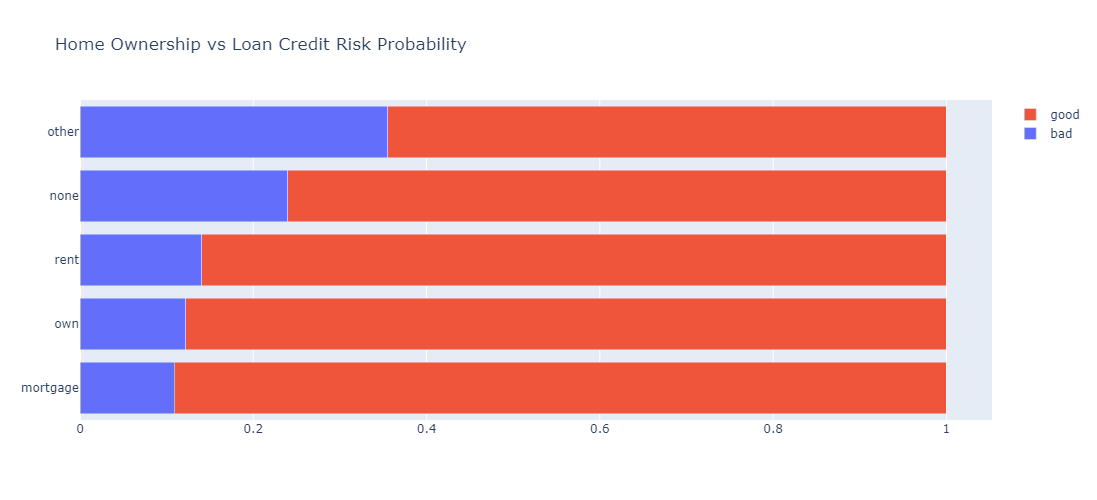

In [81]:
home_own = pd.crosstab(df_viz['home_ownership'],
                    df_viz['target'],
                    normalize='index',
                    colnames=[None]).reset_index().sort_values('bad')

fig = go.Figure()
fig.add_trace(go.Bar(
    y=home_own['home_ownership'],
    x=home_own['bad'],
    name='bad',
    orientation='h'
))
fig.add_trace(go.Bar(
    y=home_own['home_ownership'],
    x=home_own['good'],
    name='good',
    orientation='h'
))
fig.update_layout(barmode='stack',
                  title='Home Ownership vs Loan Credit Risk Probability',
                  width=700,
                  height=500,
                 )
fig.show()

### Grade

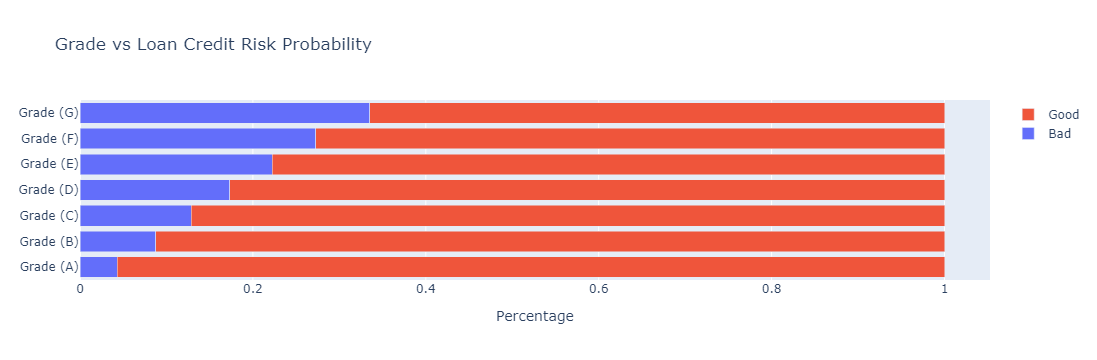

In [82]:
col = 'grade'
titleize = inflection.titleize(col)
grade_target = pd.crosstab(df_viz['grade'], df_viz['target'], normalize='index', colnames=[None]).reset_index().sort_values('bad')
grade_target['grade'] = grade_target['grade'].str.upper().sort_values()
grade_target['grade'] = grade_target['grade'].apply(lambda x: f'{titleize} ({x})')

fig = go.Figure()
fig.add_trace(go.Bar(
    y=grade_target['grade'],
    x=grade_target['bad'],
    name='Bad',
    orientation='h'
))
fig.add_trace(go.Bar(
    y=grade_target['grade'],
    x=grade_target['good'],
    name='Good',
    orientation='h'
))

fig.update_layout(barmode='stack',
                 xaxis_title='Percentage',
                 title='Grade vs Loan Credit Risk Probability')
fig.show()

### Sub Grade

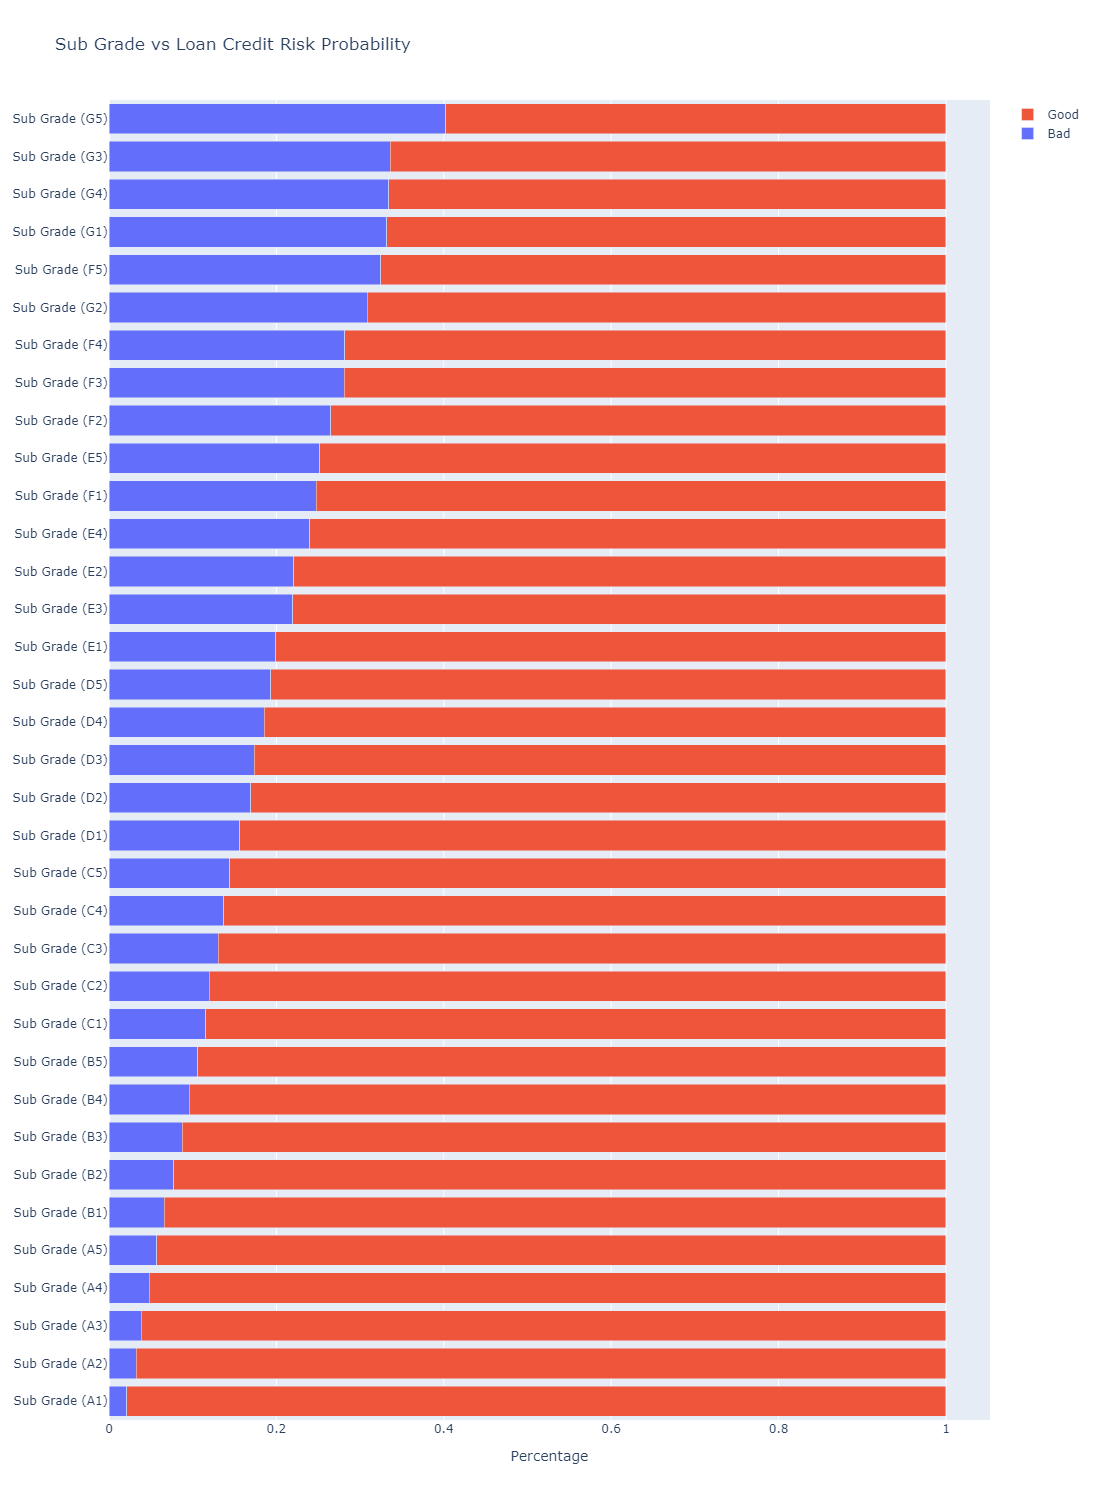

In [83]:
cols = 'sub_grade'
titleize = inflection.titleize(cols)
sub_grade_target = pd.crosstab(df_viz['sub_grade'], df_viz['target'], normalize='index', colnames=[None]).reset_index().sort_values('bad')
sub_grade_target['sub_grade'] = sub_grade_target['sub_grade'].str.upper()
sub_grade_target['sub_grade'] = sub_grade_target['sub_grade'].apply(lambda x: f'{titleize} ({x})')

fig = go.Figure()
fig.add_trace(go.Bar(
    y=sub_grade_target['sub_grade'],
    x=sub_grade_target['bad'],
    name='Bad',
    orientation='h'
))
fig.add_trace(go.Bar(
    y=sub_grade_target['sub_grade'],
    x=sub_grade_target['good'],
    name='Good',
    orientation='h'
))

fig.update_layout(barmode='stack',
                  width=700,
                  height=1500,
                 xaxis_title='Percentage',
                 title='Sub Grade vs Loan Credit Risk Probability')
fig.show()

there is some information that is similar between grade and sub grade, so that later we will drop one to avoid multicollinearity and dimensionality

In [84]:
df_viz.drop(columns=['sub_grade'], inplace=True)

### Employment Length

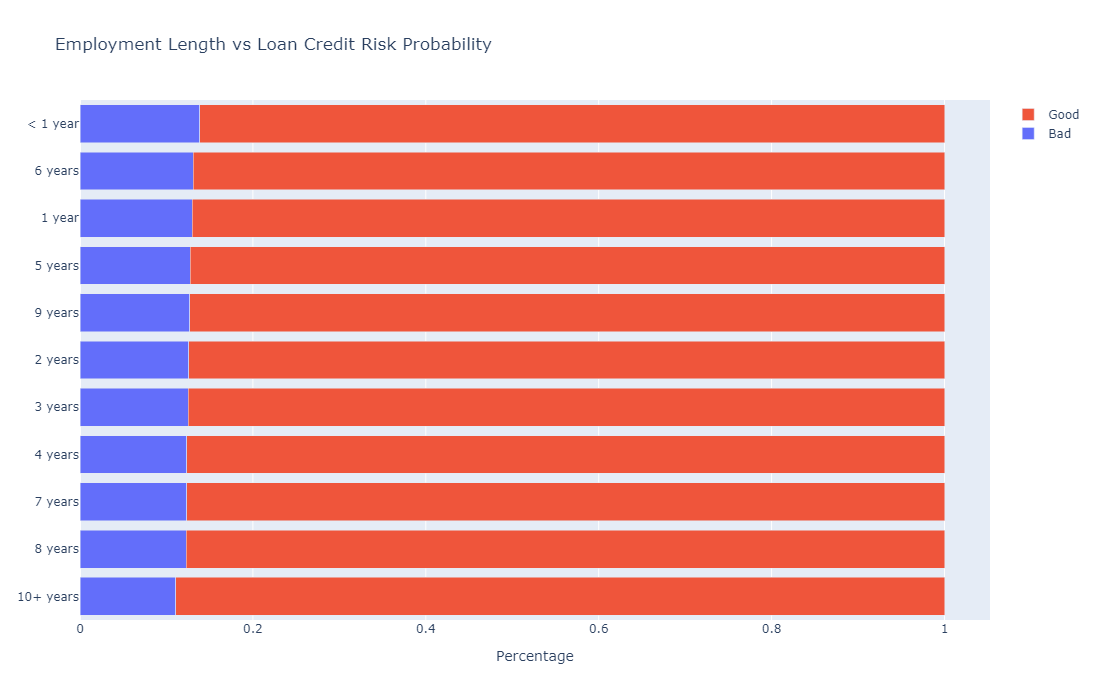

In [85]:
emp_len = pd.crosstab(df_viz['emp_length'],
                      df_viz['target'],
                      colnames=[None],
                      normalize='index').reset_index().sort_values('bad')
fig = go.Figure()
fig.add_trace(go.Bar(
    y=emp_len['emp_length'],
    x=emp_len['bad'],
    name='Bad',
    orientation='h'
            )
)
fig.add_trace(go.Bar(
    y=emp_len['emp_length'],
    x=emp_len['good'],
    name='Good',
    orientation='h'
            )
)
fig.update_layout(
    barmode='stack',
    width=1000,
    height=700,
    xaxis_title='Percentage',
    title='Employment Length vs Loan Credit Risk Probability'
)

### Purpose

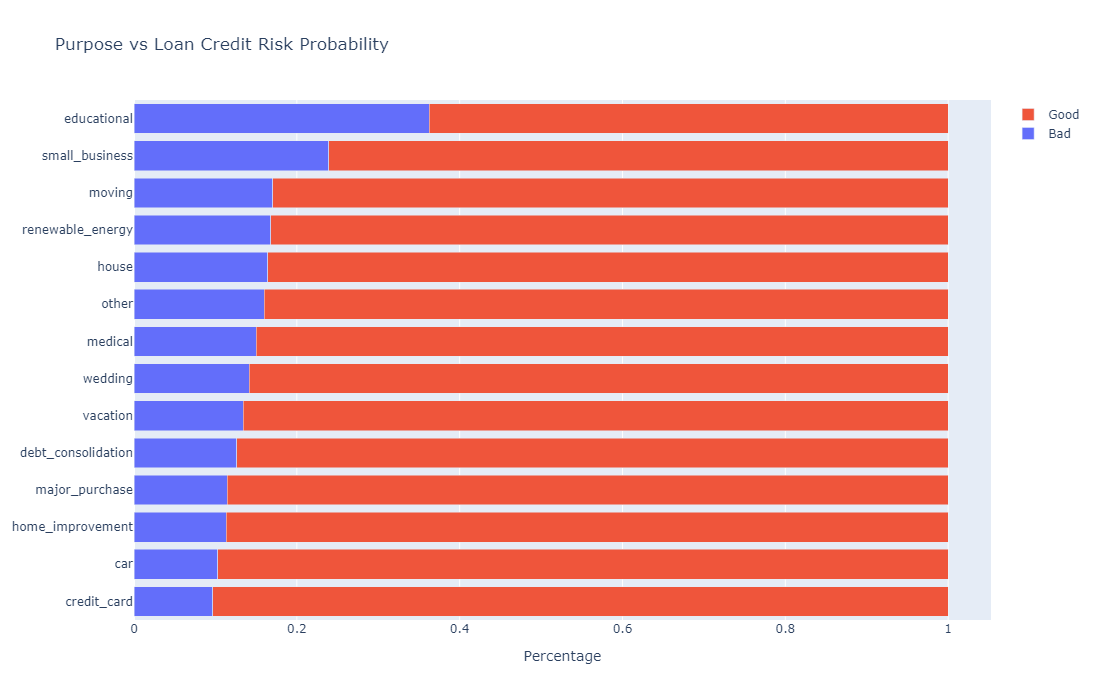

In [86]:
purpose = pd.crosstab(df_viz['purpose'],
                      df_viz['target'],
                      colnames=[None],
                      normalize='index').reset_index().sort_values('bad')
fig = go.Figure()
fig.add_trace(go.Bar(
    y=purpose['purpose'],
    x=purpose['bad'],
    name='Bad',
    orientation='h'
            )
)
fig.add_trace(go.Bar(
    y=purpose['purpose'],
    x=purpose['good'],
    name='Good',
    orientation='h'
            )
)
fig.update_layout(
    barmode='stack',
    width=1000,
    height=700,
    xaxis_title='Percentage',
    title='Purpose vs Loan Credit Risk Probability'
)

## Column Date
change the date columns and take only the year value

In [87]:
column_date = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d']
column_date_split = list()

for col in column_date:
    # define the column names
    col_month = f'{col}_month'
    col_year = f'{col}_year'
    col_update = f'{col}_update'

    column_date_split.append(col_year)

    # split to individual columns
    tmp = df_viz[col].str.split('-', expand=True)
    tmp = tmp.rename(columns={0:'month', 1:'year'})

    # add year prefix (century), whether it's 19 or 20
    tmp['year'] = tmp['year'].apply(lambda x: np.nan if pd.isna(x) else 
                                  (f'20{x}' if int(x) <= 16 else f'19{x}'))

    # convert the 'year' column to numeric
    tmp['year'] = pd.to_numeric(tmp['year'], errors='coerce')
    
    # assign to the original dataset
    df_viz[col_year] = tmp['year']
    
df_viz[column_date] = df_viz[column_date_split]
df_viz.loc[:5, column_date]

,issue_d,last_pymnt_d,last_credit_pull_d
0,2011,2015.0,2016.0
1,2011,2013.0,2013.0
2,2011,2014.0,2016.0
3,2011,2015.0,2015.0
4,2011,2016.0,2016.0
5,2011,2015.0,2015.0


### Issued Date

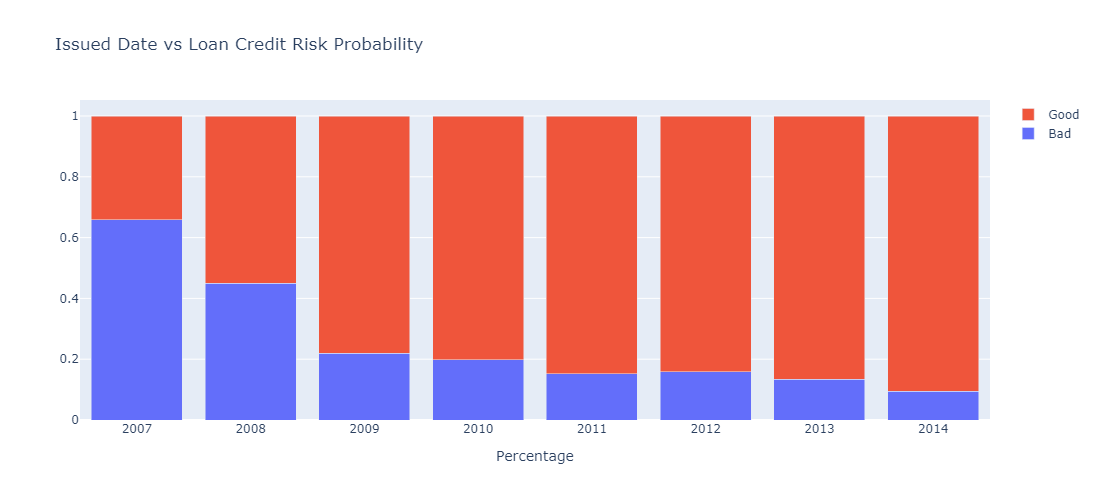

In [88]:
issued_date = pd.crosstab(df_viz['issue_d'],
                      df_viz['target'],
                      colnames=[None],
                      normalize='index').reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=issued_date['issue_d'],
    y=issued_date['bad'],
    name='Bad'
            )
)
fig.add_trace(go.Bar(
    x=issued_date['issue_d'],
    y=issued_date['good'],
    name='Good'
            )
)
fig.update_layout(
    barmode='stack',
    width=1000,
    height=500,
    xaxis_title='Percentage',
    title='Issued Date vs Loan Credit Risk Probability'
)

### Last Payment Date

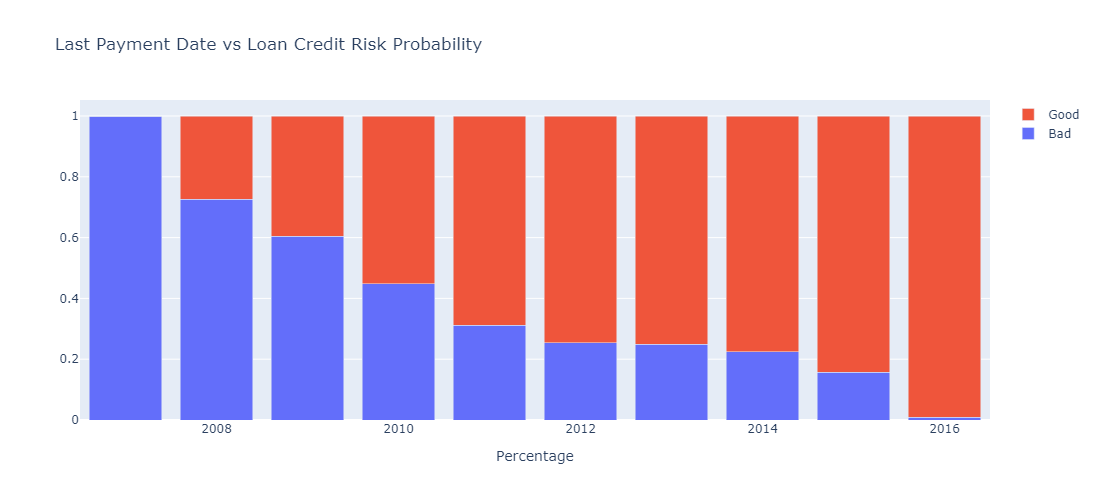

In [89]:
last_pay = pd.crosstab(df_viz['last_pymnt_d'],
                      df_viz['target'],
                      colnames=[None],
                      normalize='index').reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=last_pay['last_pymnt_d'],
    y=last_pay['bad'],
    name='Bad'
            )
)
fig.add_trace(go.Bar(
    x=last_pay['last_pymnt_d'],
    y=last_pay['good'],
    name='Good'
            )
)
fig.update_layout(
    barmode='stack',
    width=1000,
    height=500,
    xaxis_title='Percentage',
    title='Last Payment Date vs Loan Credit Risk Probability'
)

### Last Credit Pull Date

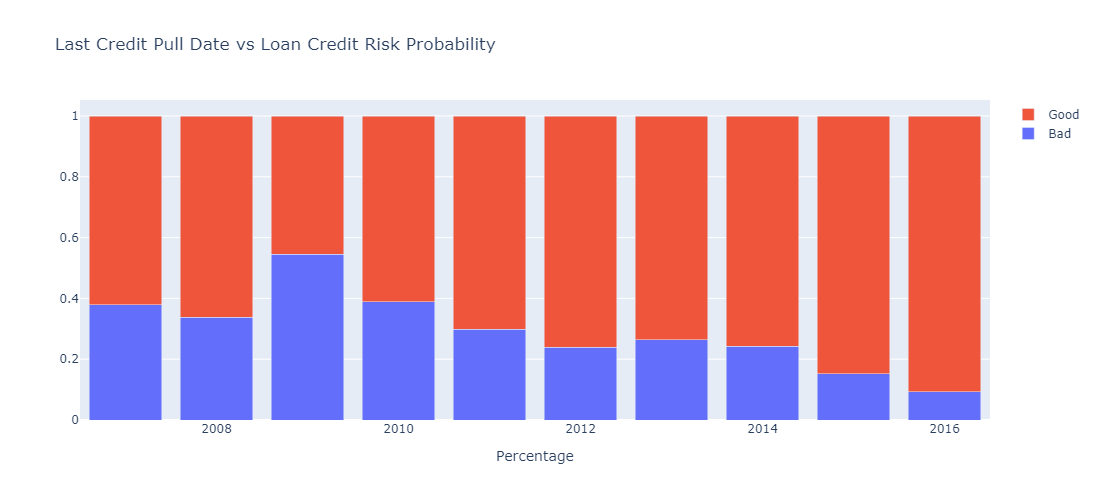

In [90]:
last_credit = pd.crosstab(df_viz['last_credit_pull_d'],
                      df_viz['target'],
                      colnames=[None],
                      normalize='index').reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=last_credit['last_credit_pull_d'],
    y=last_credit['bad'],
    name='Bad'
            )
)
fig.add_trace(go.Bar(
    x=last_credit['last_credit_pull_d'],
    y=last_credit['good'],
    name='Good'
            )
)
fig.update_layout(
    barmode='stack',
    width=1000,
    height=500,
    xaxis_title='Percentage',
    title='Last Credit Pull Date vs Loan Credit Risk Probability'
)

**Dropping Categorical Column**
- there is 1 column that only has 1 value, then I will drop it
- column earliest_cr_line, zip_code, title, emp_title, url have too many categories. So, i'll drop it to avoid cardinality
- drop column loan_status

### Update Categorical Column

In [91]:
cat_to_drop = ['application_type', 'pymnt_plan', 'loan_status', 'addr_state', 'earliest_cr_line','zip_code',
               'title', 'emp_title', 'url', 'issue_d_year', 'last_pymnt_d_year', 'last_credit_pull_d_year']
df_viz.drop(columns=cat_to_drop, inplace=True)

In [92]:
col_cat = df_viz.select_dtypes(exclude=np.number).columns.values.tolist()

df_viz[col_cat].nunique().sort_values()

term                    2
initial_list_status     2
target                  2
verification_status     3
home_ownership          5
grade                   7
emp_length             11
purpose                14
dtype: int64

## Feature Associations
### Correlation between feature categorical with label target
Using chi-square test with alpha  0.05.

- Null hypothesis (H0): feature & label independen
- Alternative hypothesis (H1): feature & label dependen

In [93]:
def chi_square_test(df, cat1='operating_systems', cat2='target'):
    # create a contigency table for input of chi-square test
    table = pd.crosstab(df[cat1], df[cat2])

    # perform the chi-square test
    chi_stats, p_value, dof, exp_val = stats.chi2_contingency(table) 

    return chi_stats, p_value, dof, exp_val

def test_results(df, categorical, target='target'):
    # remove revenue from categorical list
    cat_features = col_cat.copy()
    
    if target in cat_features:
        cat_features.remove('target')
    
    # chi-square test
    test = []
    for feature in cat_features:
        test.append((chi_square_test(df, cat1=feature, cat2=target)))
    
    # store the test results to dataframe
    cat_df = pd.DataFrame()
    cat_df['cat1'] = cat_features
    cat_df['cat2'] = target
    
    results = pd.DataFrame(test).drop(3, axis=1)
    results.columns = ['chi_stats', 'p_value', 'dof']

    results['association'] = np.nan
    for i, p_val in enumerate(results['p_value']):
        if p_val < 0.05:
            results.loc[i, 'association'] = 'dependent'
        else:
            results.loc[i, 'association']  = 'independent'
           
    return pd.concat([cat_df, results], axis=1)

test_results(df_viz, categorical=col_cat).sort_values(by='p_value').reset_index(drop=True)

,cat1,cat2,chi_stats,p_value,dof,association
0,term,target,1756.30,0.00e+00,1,dependent
1,grade,target,15333.54,0.00e+00,6,dependent
2,purpose,target,2283.58,0.00e+00,13,dependent
3,initial_list_status,target,1202.11,2.12e-263,1,dependent
4,home_ownership,target,1105.70,4.41e-238,4,dependent
5,verification_status,target,753.80,2.06e-164,2,dependent
6,emp_length,target,328.55,1.41e-64,10,dependent


All the categorical columns were tested for correlation with the target, all of them were correlated

# Data Preprocessing

In [94]:
df_prep = df_viz.copy()

## Handling Missing Value

### Missing Value

In [95]:
# total null values
null_total = pd.DataFrame(df_prep.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*df_prep.isna().sum()/df_prep.shape[0]).T.rename({0:'percentage_null'})

# combine the columns
data_null = pd.concat([null_total, data_null_percentage], axis=0).T

# only show columns that have missing values
data_null = round(data_null[data_null['total_null'] != 0].sort_values('total_null', ascending=False), 2)
data_null

,total_null,percentage_null
emp_length,21008.0,4.51
last_pymnt_d,376.0,0.08
revol_util,340.0,0.07
last_credit_pull_d,42.0,0.01
open_acc,29.0,0.01
pub_rec,29.0,0.01
total_acc,29.0,0.01
annual_inc,4.0,0.00


### Fill Missing value

In [96]:
for col in data_null.T:
    if col == 'emp_length':
        df_prep[col] = df_prep[col].fillna(df_prep['emp_length'].mode())
    else:
        df_prep[col] = df_prep[col].fillna(df_prep[col].median())

## Handling Outliers & Feature Transformation
will be applied to numeric features using yeo-johnson tranformation. If I have more time, maybe I will try the other methods.

### Before Transformation

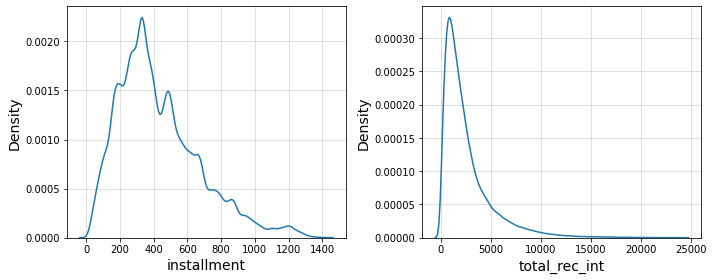

In [97]:
example = ['installment', 'total_rec_int']

plt.figure(figsize=(10, 4))
for i, col in enumerate(example):
    plt.subplot(1, 2, i+1)
    sns.kdeplot(
        x=df_prep[col]
    )
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()

plt.show()

### After Transformation

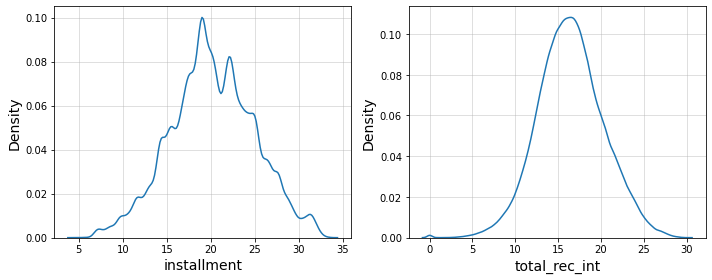

In [98]:
plt.figure(figsize=(10, 4))
for i, col in enumerate(example):
    plt.subplot(1, 2, i+1)
    sns.kdeplot(
        x=stats.yeojohnson(df[col].astype('float64'))[0]
    )
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()

plt.show()

## Feature Encoding

### Label Encoding
parsing column that has only 2 values

In [99]:
enc = LabelEncoder()
df_prep.loc[:, ['term', 'initial_list_status', 'target']] = df_prep.loc[:, ['term', 'initial_list_status', 'target']].apply(enc.fit_transform)
df_prep.head()

,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,target
0,0,162.87,b,10+ years,rent,24000.0,verified,2011,credit_card,3.0,0.0,13648,83.7,9.0,0,0.0,5000.00,861.07,0.00,0.00,2015.0,171.62,2016.0,1
1,1,59.83,c,< 1 year,rent,30000.0,source verified,2011,car,3.0,0.0,1687,9.4,4.0,0,0.0,456.46,435.17,0.00,117.08,2013.0,119.66,2013.0,0
2,0,84.33,c,10+ years,rent,12252.0,not verified,2011,small_business,2.0,0.0,2956,98.5,10.0,0,0.0,2400.00,603.65,0.00,0.00,2014.0,649.91,2016.0,1
3,0,339.31,c,10+ years,rent,49200.0,source verified,2011,other,10.0,0.0,5598,21.0,37.0,0,0.0,10000.00,2209.33,16.97,0.00,2015.0,357.48,2015.0,1
4,1,67.79,b,1 year,rent,80000.0,source verified,2011,other,15.0,0.0,27783,53.9,38.0,0,766.9,2233.10,1009.07,0.00,0.00,2016.0,67.79,2016.0,1


### One Hot Encoding

In [100]:
col_ohe = ['grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose']
one_hot = pd.get_dummies(df_prep[col_ohe], drop_first=True)
df_prep.drop(columns=col_ohe, axis=1, inplace=True)
one_hot.head()

,grade_b,grade_c,grade_d,grade_e,grade_f,grade_g,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_none,home_ownership_other,home_ownership_own,home_ownership_rent,verification_status_source verified,verification_status_verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Feature Normalization & Standardization

In [101]:
def data_scaling(data, features, scaler):
    
    for var in df[features]:
        df[var], _ = stats.yeojohnson(df[var].astype('float64'))
    
    # apply a scaler to data
    data[features] = scaler.fit_transform(data[features])
    
    return data[features].round(3).head()
data_scaling(df_prep, col_num, StandardScaler())

,installment,annual_inc,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt
0,-1.11,-0.90,-1.64,-0.31,-0.12,1.16,-1.39,-0.69,-0.55,-0.70,-0.12,-0.15,-0.53
1,-1.53,-0.79,-1.64,-0.31,-0.70,-1.97,-1.82,-0.69,-1.20,-0.87,-0.12,0.06,-0.54
2,-1.43,-1.11,-1.84,-0.31,-0.64,1.78,-1.30,-0.69,-0.92,-0.80,-0.12,-0.15,-0.45
3,-0.38,-0.44,-0.24,-0.31,-0.51,-1.48,1.03,-0.69,0.16,-0.15,3.10,-0.15,-0.50
4,-1.50,0.12,0.77,-0.31,0.56,-0.10,1.11,-0.57,-0.94,-0.64,-0.12,-0.15,-0.55


In [102]:
def data_scaling(data, features, scaler):
    
    # apply a scaler to data
    data[features] = scaler.fit_transform(data[features])
    
    return data[features].round(3).head()
data_scaling(df_prep, column_date, MinMaxScaler())

,issue_d,last_pymnt_d,last_credit_pull_d
0,0.57,0.89,1.00
1,0.57,0.67,0.67
2,0.57,0.78,1.00
3,0.57,0.89,0.89
4,0.57,1.00,1.00


Combine 2 data frame already encode

In [103]:
data_model = pd.concat([df_prep, one_hot], axis=1)
data_model

,term,installment,annual_inc,issue_d,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,target,grade_b,grade_c,grade_d,grade_e,grade_f,grade_g,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_none,home_ownership_other,home_ownership_own,home_ownership_rent,verification_status_source verified,verification_status_verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,-1.11e+00,-0.90,0.57,-1.64,-0.31,-0.12,1.16,-1.38,0,-0.69,-0.55,-0.70,-0.12,-0.15,0.89,-0.53,1.00,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,-1.53e+00,-0.79,0.57,-1.64,-0.31,-0.70,-1.97,-1.82,0,-0.69,-1.20,-0.87,-0.12,0.06,0.67,-0.54,0.67,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,-1.43e+00,-1.11,0.57,-1.84,-0.31,-0.64,1.78,-1.30,0,-0.69,-0.92,-0.80,-0.12,-0.15,0.78,-0.45,1.00,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,-3.81e-01,-0.44,0.57,-0.24,-0.31,-0.51,-1.48,1.03,0,-0.69,0.16,-0.15,3.10,-0.15,0.89,-0.50,0.89,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,-1.50e+00,0.12,0.57,0.76,-0.31,0.56,-0.10,1.12,0,-0.57,-0.94,-0.64,-0.12,-0.15,1.00,-0.55,1.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,1,2.38e-03,0.67,1.00,1.37,-0.31,0.34,0.90,0.94,1,1.28,-0.43,0.79,-0.12,-0.15,1.00,-0.48,1.00,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
466281,1,6.18e-01,0.09,1.00,1.37,1.64,0.10,-0.42,0.43,0,-0.69,-1.00,0.10,-0.12,-0.15,0.78,-0.56,1.00,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
466282,1,3.38e-01,-0.50,1.00,1.37,-0.31,-0.46,-0.21,1.55,0,1.58,-0.37,1.40,-0.12,-0.15,1.00,-0.47,0.89,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
466283,0,-1.52e+00,0.18,1.00,1.97,-0.31,-0.23,-1.46,0.17,1,-0.69,-0.98,-0.99,-0.12,-0.15,0.78,-0.29,0.89,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


### Handling Class Imbalance
Before resampling, the dataset is first split into train and test with a ratio of 80% train and 20% test. Then, resampling is only applied to the train set so that the performance model is not too optimistic.

In [104]:
X = df_prep.drop(['target'], axis=1)
y = df_prep['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((326399, 18), (139886, 18), (326399,), (139886,))

In [105]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['target'])

data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

In [106]:
data_smote['target'].value_counts()

0    286275
1    286275
Name: target, dtype: int64

# Modeling

In [107]:
X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test.copy()
y_test_model = y_test.copy()

In [134]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
clf.fit(X_train_model, y_train_model)

y_pred_train = clf.predict(X_train_model)
print("TRAIN CLASSIFICATION REPORT")
print(classification_report(y_train_model, y_pred_train, digits=3))

y_pred_test = clf.predict(X_test_model)
print("TEST CLASSIFICATION REPORT")
print(classification_report(y_test_model, y_pred_test, digits=3))


TRAIN CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0      0.940     0.945     0.942    286275
           1      0.945     0.939     0.942    286275

    accuracy                          0.942    572550
   macro avg      0.942     0.942     0.942    572550
weighted avg      0.942     0.942     0.942    572550

TEST CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0      0.671     0.885     0.763     17196
           1      0.983     0.939     0.961    122690

    accuracy                          0.932    139886
   macro avg      0.827     0.912     0.862    139886
weighted avg      0.945     0.932     0.936    139886



In [169]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = clf.predict_proba(X_test_model)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test_model), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test_model.index

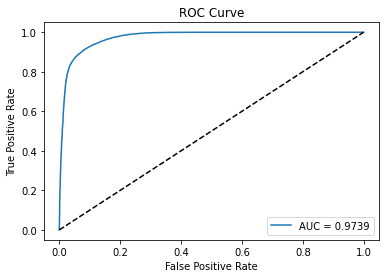

In [170]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

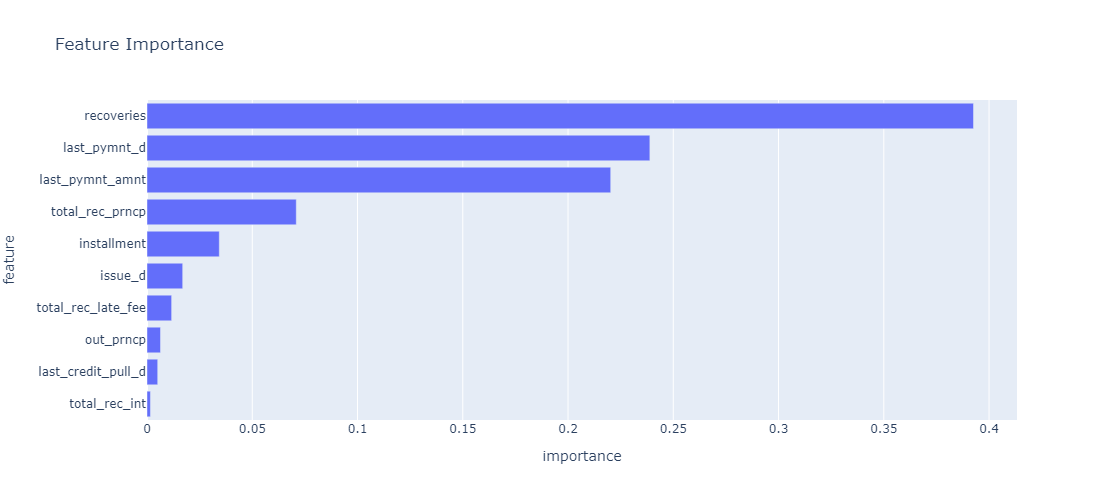

In [164]:
feature_importances = clf.feature_importances_
feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = feature_names
df_feature_importance['importance'] = feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)

df_all_features = df_all_features.head(10).sort_values('importance')
fig = px.bar(df_all_features, x='importance', y='feature', title='Feature Importance')
fig.update_layout(
    width=1000,
    height=500
)
fig.show()